In [1]:
from langchain_openai import ChatOpenAI 
import os
from load_dotenv import load_dotenv

#This function will load all the variables from the .env file and will
#make them available in the os.environ dictionary (env variables)

load_dotenv()

if os.environ.get("OPENAI_API_KEY"):
    print("Bro API KEY Variable exists")
else :
    raise ValueError("OPENAI API KEY not found")

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser, PydanticOutputParser

llm_openai = ChatOpenAI(model="gpt-5-mini", temperature=0)

Bro API KEY Variable exists


# **Tools**

In [9]:
# TOOL - 1 [News Search Tool]

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()

search_tool.invoke("what is samuel eto'o ")

"Samuel Eto ' o Fils (French pronunciation: [samɥɛl eto fis]; born 10 March 1981) is a Cameroonian football administrator and former player who is the current president of the Cameroonian Football Federation. Jan 19, 2026 · Samuel Eto’o (born March 10, 1981, Nkon, Cameroon) is a Cameroonian professional football (soccer) player who is considered one of the greatest African footballers of all time. Samuel Eto ' o is the brother of Etienne Eto 'o (Retired). Samuel Eto ' o is the brother of David Eto'o (Retired). Samuel Eto ' o is the uncle of Ulrich Bapoh (KFC Uerdingen 05). Samuel Eto ' o is the father of Etienne Eto ' o (Villarreal CF B). Feb 7, 2025 · Samuel Eto ’ o Fils, a name synonymous with determination, precision, and unmatched goal-scoring prowess, stands as one of FC Barcelona’s greatest forwards. His time at the club not only brought unparalleled success but also cemented his legacy as a key figure in Barcelona’s storied history. Dec 1, 2025 · Samuel Eto'o was re-elected unop

In [14]:
# TOOL - 1 [News Search Tool]

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(description="this is a tool to search the web for news")

#TOOL - 2 [Wikipedia search tool]

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(),description="This is a tool to search wikipedia")

In [12]:
wikipedia_tool.invoke("what is the capital of france")

"Page: Closed-ended question\nSummary: A closed-ended question is any question for which a researcher provides research participants with options from which to choose a response. Closed-ended questions are sometimes phrased as a statement that requires a response.\nA closed-ended question contrasts with an open-ended question, which cannot easily be answered with specific information.\n\n\n\nPage: France\nSummary: France, officially the French Republic, is a country primarily located in Western Europe. Its overseas regions and territories include French Guiana in South America, Saint Pierre and Miquelon in the North Atlantic, the French West Indies, and many islands in Oceania and the Indian Ocean. Metropolitan France shares borders with Belgium and Luxembourg to the north; Germany to the northeast; Switzerland to the east; Italy and Monaco to the southeast; Andorra and Spain to the south; and a maritime border with the United Kingdom to the northwest. Its metropolitan area extends fro

In [15]:
# TOOL - 3 [Custom Enterprise Tool]

from langchain.tools import tool

def enterprise_tool(query:str)-> str:

    """This is a tool to send emails to employees"""

    return "Email Sent"

In [20]:
ToolKit = [search_tool, wikipedia_tool, enterprise_tool]
ToolKit

[DuckDuckGoSearchRun(description='this is a tool to search the web for news', api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text')),
 WikipediaQueryRun(description='This is a tool to search wikipedia', api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\pc\\Langchain_Tutorial\\.venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=3, lang='en', load_all_available_meta=False, doc_content_chars_max=4000)),
 <function __main__.enterprise_tool(query: str) -> str>]

# **ReAct Agent**

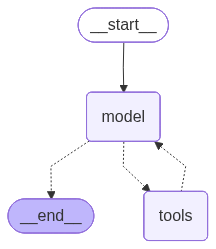

In [21]:

from langchain.agents import create_agent
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-5-mini",
    temperature=0.1,
    max_tokens=1000,
    timeout=30
)
agent = create_agent(model, tools=ToolKit)
agent

In [24]:
example_query = "Give me the latest news about the stock market"

events = agent.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Give me the latest news about the stock market
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_93yhzw415E0oRSZADUlhjBf5)
 Call ID: call_93yhzw415E0oRSZADUlhjBf5
  Args:
    query: stock market latest news February 9 2026 stocks today S&P 500 Nasdaq Dow Jones market movers
================================= Tool Message =================================
Name: duckduckgo_search

Wall Street has absorbed the Fed's message that a deep cut will prove positive for the economy. ... Today s news ... Stock market ... FAFSA 2026 -27 Investors are braced for a busy day of earnings, with Amazon serving as the highlight. ... Stock market ... FAFSA 2026 -27 ... Morning Brief: Market Sunrise US stocks jumped after President Trump said he has "no intention" of firing Federal Reserve Chair Jerome Powell, easing fears on Wall ... Stock Market Today : Dow

# **Manually Binding The LLM With Tools**

In [ ]:
#Without Binding
llm_openai.invoke("what's the latest news about the stock market?")

AIMessage(content='I don’t have live access to news or market data, so I can’t tell you what’s happening right this minute. I can, however:\n\n- Explain the key things that typically move markets right now (Fed policy, inflation data, jobs numbers, corporate earnings, geopolitics, commodity moves, and major economic reports).\n- Point you to reliable real-time sources and how to check them quickly (CNBC, Bloomberg, Reuters, WSJ, MarketWatch, Yahoo Finance, Google Finance, your broker’s app).\n- Tell you how to read headlines and market indicators to judge whether markets are rising, falling, or more volatile (index futures, S&P 500/Dow/Nasdaq, VIX, sector leaders, top gainers/losers).\n- Summarize market themes through my last update (June 2024) and likely ongoing drivers you should watch.\n\nWhich would you prefer?\n- A quick list of trustworthy live sources and how to check them now?\n- A short checklist of what market headlines mean and how to interpret them?\n- A summary of recent 

In [28]:
#With Binding
llm_binded = llm_openai.bind_tools(ToolKit)
llm_openai.invoke("what's the latest news about the stock market?")

AIMessage(content='I don’t have real-time internet access — my training data goes to June 2024 — so I can’t fetch today’s live headlines or intraday market moves. I can, however:\n\n- Explain the main themes currently driving markets and what to watch.\n- Tell you the best sources and tools to get live market news and quotes.\n- Summarize or analyze any specific headlines, articles, or tickers you paste here.\n- Create a short daily-market checklist you can use to interpret today’s action.\n\nWhat would you prefer? If you want live headlines now, try one of these (search or open in a finance app):\n- “S&P 500 news” / “Dow Jones news” / “Nasdaq news”\n- “U.S. stock market open/close today”\n- “CPI today” / “Fed decision” / “US jobs report”\n- “[Ticker] earnings today” (for a specific company)\n\nQuick guide — reliable sources and tools for live market news:\n- News: Reuters, Bloomberg, Financial Times, Wall Street Journal, CNBC\n- Free summaries: Yahoo Finance, Google Finance, MarketWat